In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

### Forma de T(x,y)

In [223]:
x = sym.Symbol('x')
y = sym.Symbol('y')

a00 = sym.Symbol('a00')
a01 = sym.Symbol('a01')
a10 = sym.Symbol('a10')
a11 = sym.Symbol('a11')

coeffs = np.array([[a00 , a01] , [a10 , a11]])
def funcion_coeffs():
    expr=0
    for i in range(2):
        for j in range(2):
            expr += coeffs[i][j]* x**i * y**j
            
    return expr
funcion_coeffs()

a00 + a01*y + a10*x + a11*x*y

### Definir vértices

In [220]:
position = np.zeros((4,2)) 

P1 = [1,1]
P2 = [-1,1]
P3 = [-1,-1]
P4 = [1,-1]
vertix = [P1,P2,P3,P4]

for i in range(4): 
    for j in range(2): 
        position[i,j] = vertix[i][j]
print('Matriz pos de vertices ordenada:')
print(position)

Matriz pos de vertices ordenada:
[[ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]]


### Hallar coeficientes

In [181]:
x = position[:,0]
y = position[:,1]

M = np.zeros((4,4))

for i in range(4):
     M[i] = [1, x[i] , y[i] , x[i]*y[i]]

In [228]:
M_inv = np.linalg.inv(M)
sol = M_inv@t
print('Los coeficientes son:')
print(sol)

Los coeficientes son:
[ 0.95 -0.3   0.55 -0.2 ]


### Comprobar coeficientes

In [225]:
F = lambda p , x , y: p[0] + p[1]*x + p[2]*y + p[3]*x*y

In [222]:
F(sol,1,1)

1.0

In [230]:
dic={'P1':F(sol , 1,1),'P2':F(sol , -1,1),'P3':F(sol , -1,-1),'P4':round(F(sol,1,-1),2)}
print('La temperatura en Kelvin en los vértices es:')
print(dic)

La temperatura en Kelvin en los vértices es:
{'P1': 1.0, 'P2': 2.0, 'P3': 0.5, 'P4': 0.3}


### Graficar

Text(0.5, 0, 'T(X,Y)')

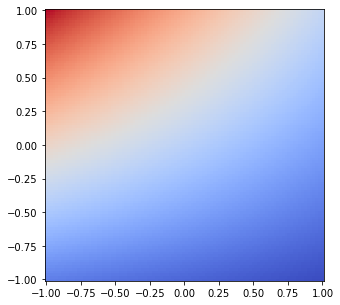

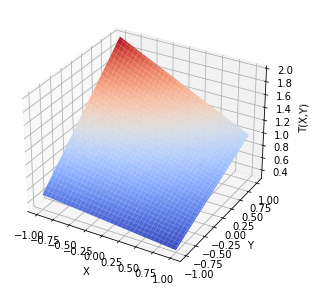

In [226]:
X = np.arange(-1,1.01, 0.02)
Y = np.arange(-1,1.01, 0.02)
X,Y = np.meshgrid(X,Y)
Z = X.copy()

rows = X.shape[0]
cols = X.shape[1]

for i in range(rows): 
    for j in range(cols):
        Z[i,j] =  F(sol , X[i,j] , Y[i,j])

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.pcolor(X,Y,Z,cmap = "coolwarm") 

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(1,1,1,projection = "3d")
ax2.plot_surface(X,Y,Z,cmap = "coolwarm") 
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('T(X,Y)')

### Estimar temperatura punto P=(0,0.5)

In [186]:
sol_p=F(sol , 0,0.5)
print("En el punto P=[0,0.5] la temperatura T es:\n%.3f K"%sol_p)

En el punto P=[0,0.5] la temperatura T es:
1.225 K


### Minimización

In [187]:
def MatrizRot(theta ): 
    MRot = np.array([[np.cos(theta) , -np.sin(theta)] , [np.sin(theta) , np.cos(theta)]])
    return MRot

In [188]:
def rotacion (position,theta):
    rot =[]
    for i in range(4): 
            rot.append(MatrizRot(theta)@position[i])
    return np.array(rot)
        

In [189]:
def interpolacion(P,theta,t):
    
    M = np.zeros((4,4))
    vertices = rotacion(position,theta)
    xr = vertices[:,0]
    yr = vertices[:,1]
    for i in range(4):
         M[i] = [1, xr[i] , yr[i] , xr[i]*yr[i]]
            
    M_inv = np.linalg.inv(M)
    sol = M_inv@t
    
    return F(sol, 0 , 0.5)    


In [190]:
theta = np.linspace(0,2*np.pi , 200)

def ThetaMin(theta , P , t): 
    min= 10
    temp = 0
    theta_opt = 0
    for i in range(len(theta)): 
        temp = interpolacion(P,theta[i],t)
        
        if temp < min :
            min = temp 
            theta_opt = theta[i]
            
    return min , theta_opt
    

In [227]:
temp_min,theta_opt=ThetaMin(theta,position, t)
print('La temperatura mínima en el punto P se obtiene para theta = %.3f y tiene un valor de %.3f K'%(theta_opt,temp_min))

La temperatura mínima en el punto P se obtiene para theta = 2.652 y tiene un valor de 0.637 K
